In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph



# Load list of branching instructions
In the form of instruction addresses 


In [2]:
import json 

test_name = "diamond"

input_binary = os.path.abspath(f"../test_programs/{test_name}/{test_name}")
output_assembly = os.path.abspath(f"../test_programs/{test_name}/{test_name}_rw.s")
output_binary = os.path.abspath(f"../test_programs/{test_name}/{test_name}_rw")
test_values = os.path.abspath(f"../test_programs/{test_name}/test_inputs.txt")

# instrument each function seperately 
First instrument the code, then dump the rewritten program, then compile into new binary using gcc 

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


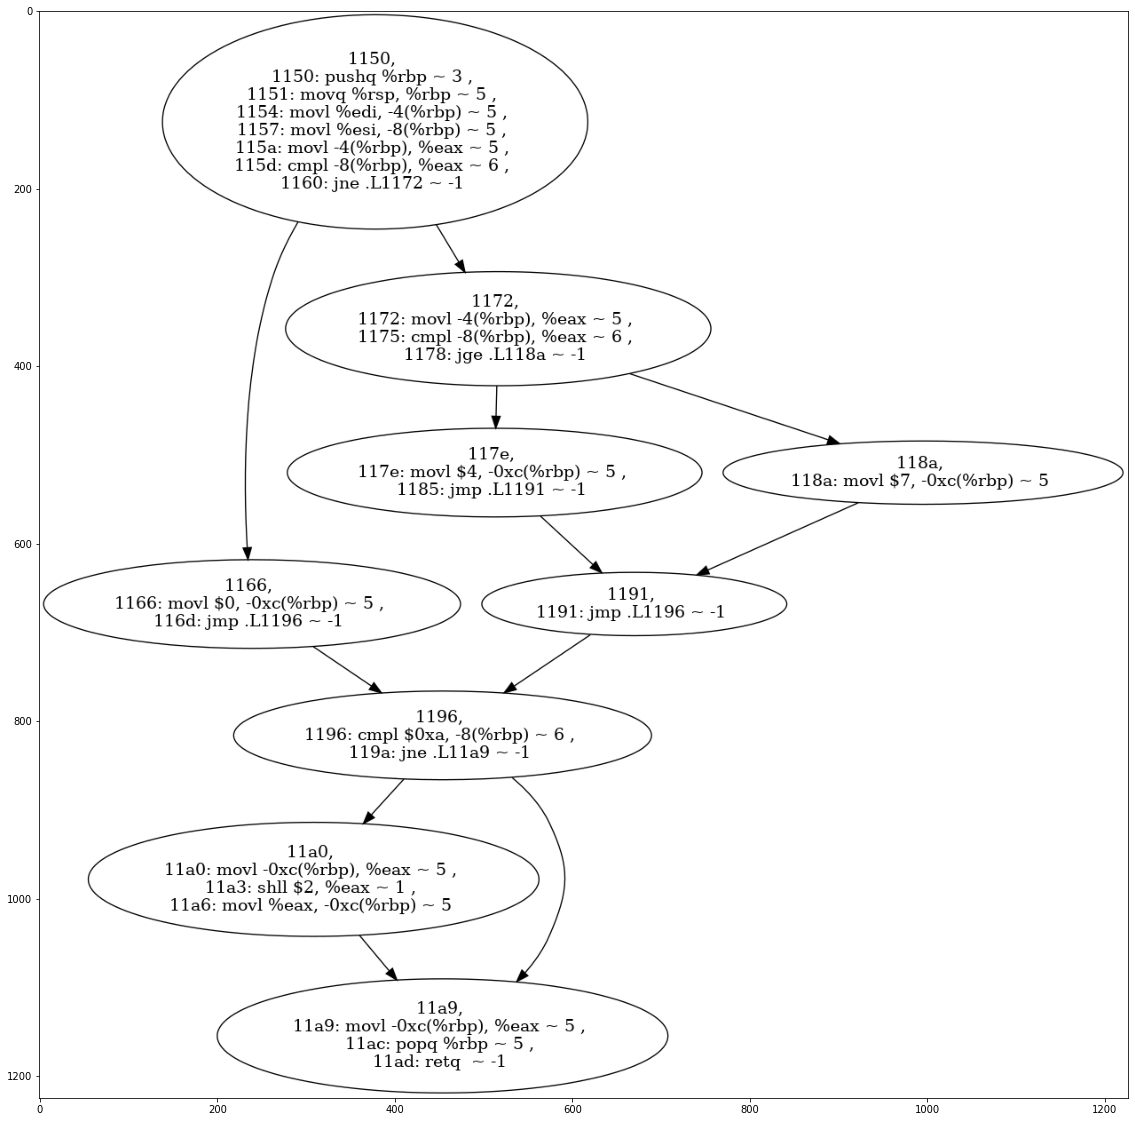

In [3]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

tool = NemesisInstrumentProgram(input_binary, output_assembly)

func = tool.functions['diamond']
figs, axs = plt.subplots(1, figsize=(20,20))

axs.imshow(func.render_cfg())

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
diamond
main


CompletedProcess(args=['gcc', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/diamond/diamond_rw.s', '-o', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/diamond/diamond_rw'], returncode=0)

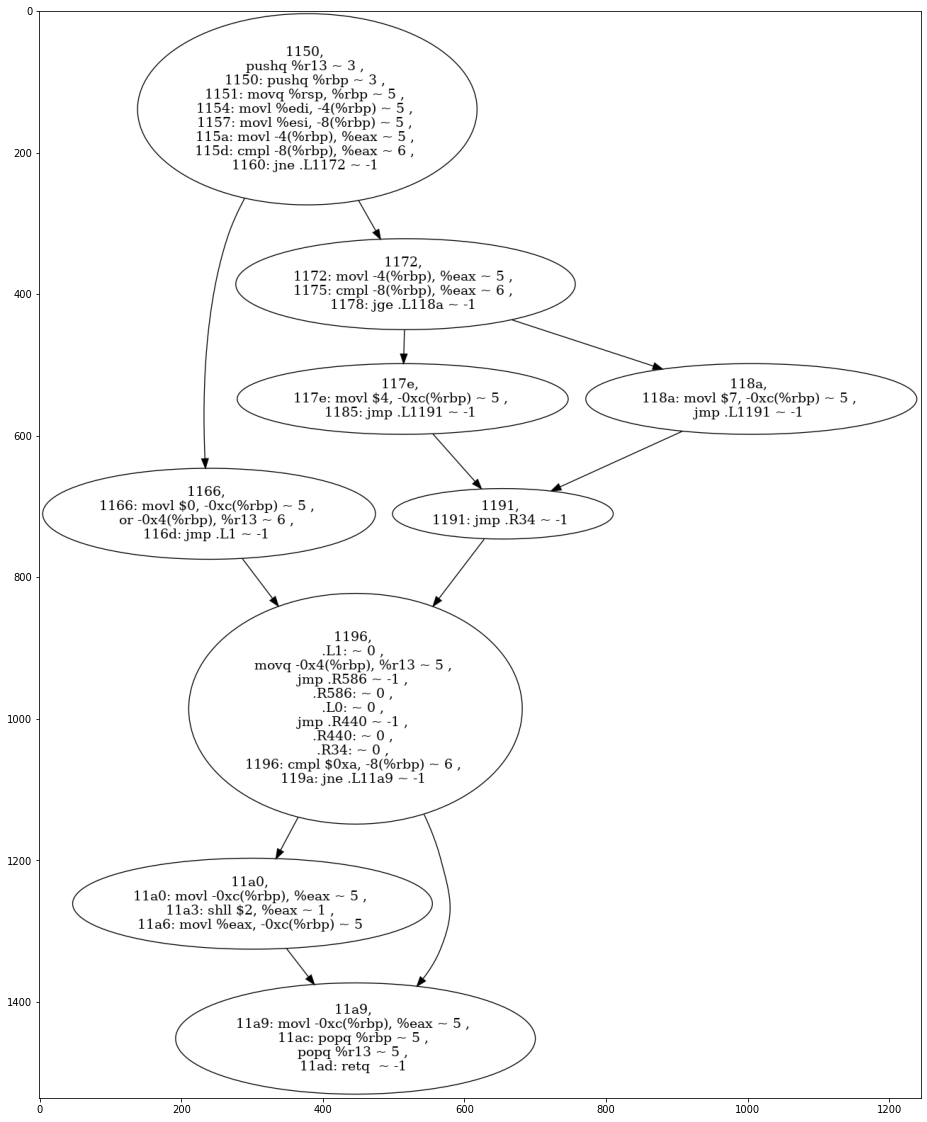

In [4]:
target_node = func.cfg.get_node('1150')
assert(target_node is not None)

tool = NemesisInstrumentProgram(input_binary, output_assembly)
tool.instrument_program([1160, 1178])

figs, axs = plt.subplots(1, figsize=(20,20))
axs.imshow(tool.functions['diamond'].render_cfg())
tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3db8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


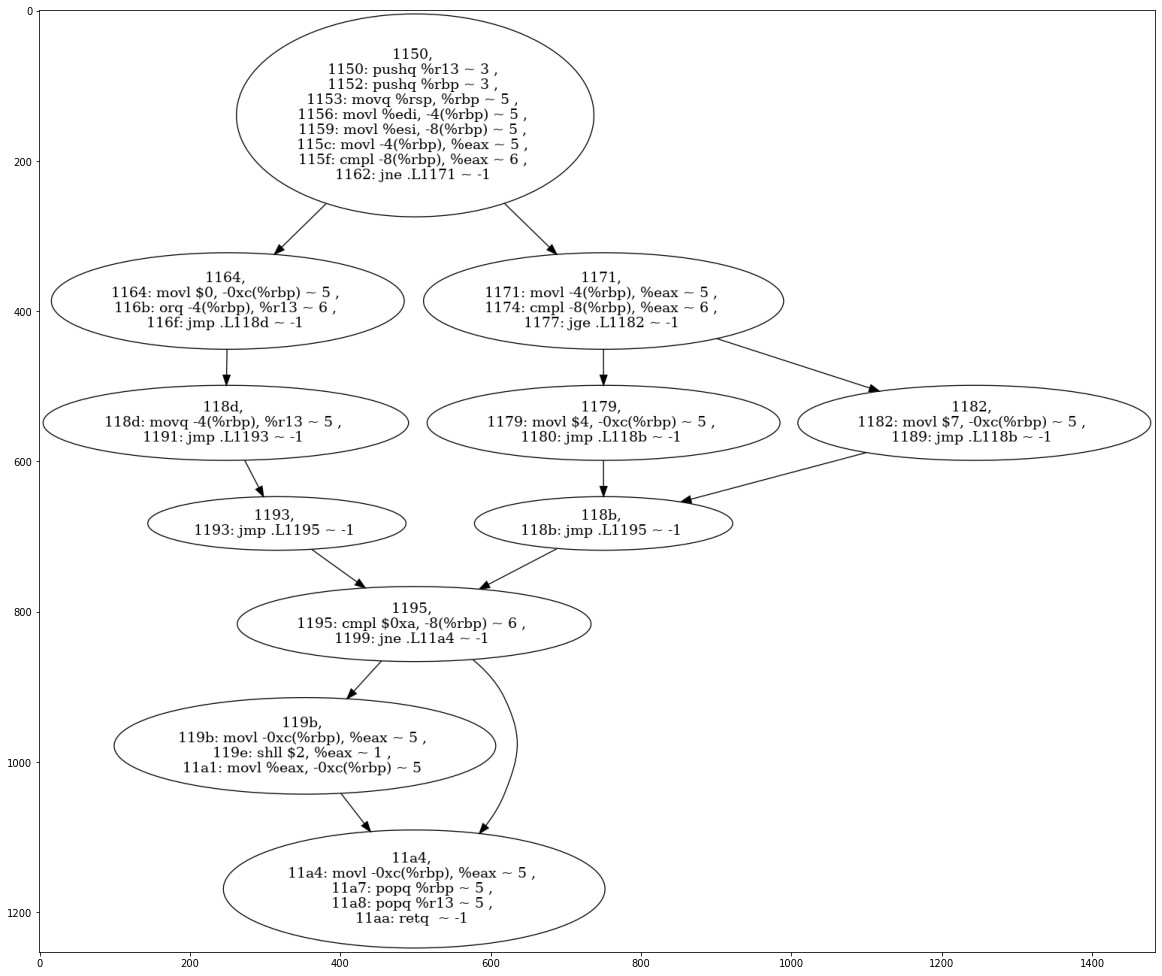

In [5]:
from rwtools.nemesis.evaluationtool import NemesisEvaluateProgram 
evaluation = NemesisEvaluateProgram("/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/diamond/diamond_rw", "")

figs, axs = plt.subplots(1, figsize=(20,20))

evaluation.evaluate_program([1161, 1176])
axs.imshow(evaluation.functions['diamond'].render_cfg())


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3db8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
evaluation: 
['1150', '1166', '1', '0', '1196'] 40 54
increase percentage: 1.35
['1150', '1172', '117e', '1191', '1196'] 51 54
increase percentage: 1.06
['1150', '1172', '118a', '1191', '1196'] 51 54
increase percentage: 1.06


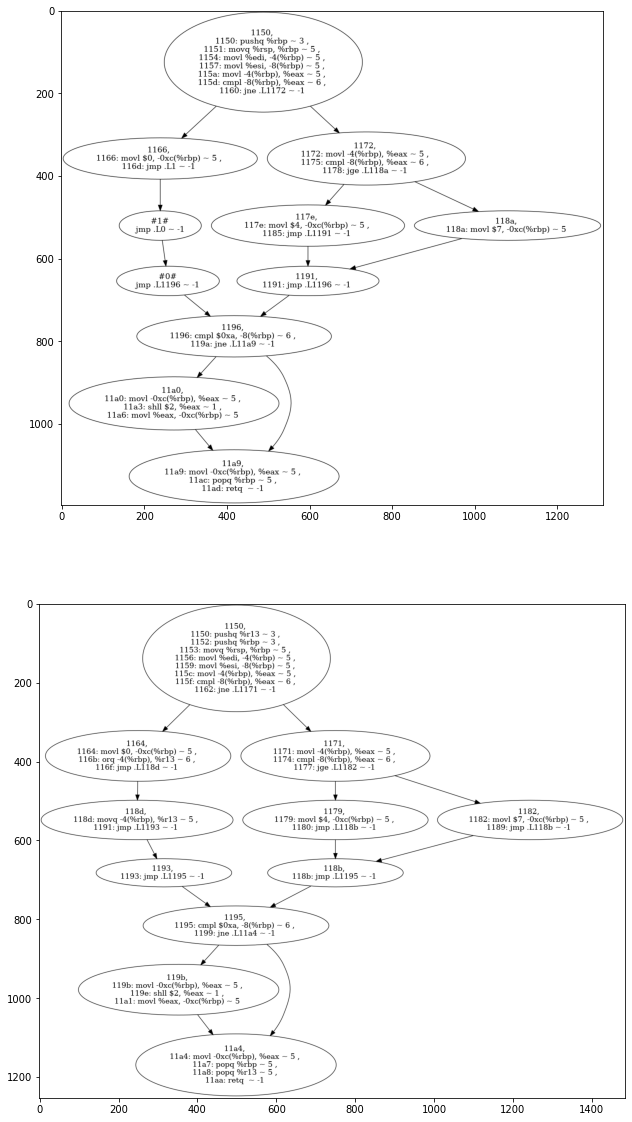

In [6]:
from rwtools.nemesis.evaluationtool import NemesisEvaluateProgram 

from networkx.algorithms.isomorphism import  is_isomorphic
from rwtools.nemesis.evaluationtool import mapping 
from rwtools.nemesis.graph.abstract_nemesis_node import flatten 
import networkx as nx
from rwtools.nemesis.evaluationtool import evaluate_runtime 

original = NemesisEvaluateProgram(input_binary, "")
modified = NemesisEvaluateProgram(output_binary, "")

# insert nodes so that the two graphs are isomorphic 
orig_func = original.functions["diamond"]
orig_func.cfg.unwind_graph() # remove cycles 
target_node = orig_func.cfg.get_node('1150')
orig_func.cfg.insert_nodes(target_node) # insert nodes where necessary 

modified_func = modified.functions["diamond"]
modified_func.cfg.unwind_graph()

figs, axs = plt.subplots(2, figsize=(20,20))
axs[0].imshow(orig_func.render_cfg())
axs[1].imshow(modified_func.render_cfg())

print('evaluation: ')
results = evaluate_runtime(orig_func, modified_func, target_node)

for path, original, modified in results: 
    print([p.id for p in path], original, modified)
    print(f"increase percentage: {float(modified)/float(original):.2f}")